# Análisis de Factores de Victoria en F1
En este notebook, utilizaremos el dataset limpio para responder a dos preguntas clave sobre el rendimiento en Fórmula 1:
 **¿Qué tan decisiva es la Pole Position?** ¿Garantiza la victoria?
 **¿Existe la ventaja de local?** ¿Los pilotos rinden mejor en su país?

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt # busque en internet tutoriales para poder hacer graficos usando pyplot (https://matplotlib.org/stable/tutorials/pyplot.html)
import seaborn as sns  # busque en internet tutoriales para poder hacer graficos usando seaborn (https://seaborn.pydata.org/)

df = pd.read_csv('../data/df_analisis_final.csv')

df

,año,apellido_piloto,pais_circuito,posicion_salida,posicion_final,puntos,id_carrera,id_piloto,pais_piloto,es_local,gano_desde_pole
0,2009,Button,Australia,1,1,10.0,1,18,UK,False,True
1,2009,Barrichello,Australia,2,2,8.0,1,22,Brazil,False,False
2,2009,Trulli,Australia,20,3,6.0,1,15,Italy,False,False
3,2009,Glock,Australia,19,4,5.0,1,10,Germany,False,False
4,2009,Alonso,Australia,10,5,4.0,1,4,Spain,False,False
...,...,...,...,...,...,...,...,...,...,...,...
26663,2024,Magnussen,UAE,14,16,0.0,1144,825,Danish,False,False
26664,2024,Lawson,UAE,12,17,0.0,1144,859,New Zealander,False,False
26665,2024,Bottas,UAE,9,18,0.0,1144,822,Finnish,False,False
26666,2024,Colapinto,UAE,20,19,0.0,1144,861,Argentina,False,False


## Hipótesis 1: El peso de la 'Pole Position'
**Pregunta:** ¿Salir primero (Pole Position) garantiza ganar la carrera?
Para responder, analice todos los Grandes Premios desde 1950 y calcule el porcentaje de veces que el piloto que salió en la posición 1 terminó ganando la carrera.

In [2]:
# Calculo de estadisticas

# Conteo de  cuántas victorias hubo desde la Pole por año
victorias_pole = df.groupby('año')['gano_desde_pole'].sum()

# Conteo cuántas carreras hubo en total ese año
total_carreras = df.groupby('año')['id_carrera'].nunique()

# Calculo del porcentaje entre (Victorias / Carreras)
porcentaje_victorias = (victorias_pole / total_carreras) * 100



In [3]:
victorias_pole

año
1950     3
1951     3
1952     5
1953     4
1954     4
        ..
2020    10
2021    11
2022    10
2023    14
2024    11
Name: gano_desde_pole, Length: 75, dtype: int64

In [4]:
total_carreras

año
1950     7
1951     8
1952     8
1953     9
1954     9
        ..
2020    17
2021    22
2022    22
2023    22
2024    24
Name: id_carrera, Length: 75, dtype: int64

In [5]:
# Porcentaje de carreras ganadas desde la pole

round(porcentaje_victorias.mean(),2)

np.float64(41.83)

### Evolución Histórica
El siguiente gráfico muestra cómo ha cambiado la importancia de la Pole Position a lo largo de las décadas. La línea horizontal indica el promedio histórico.

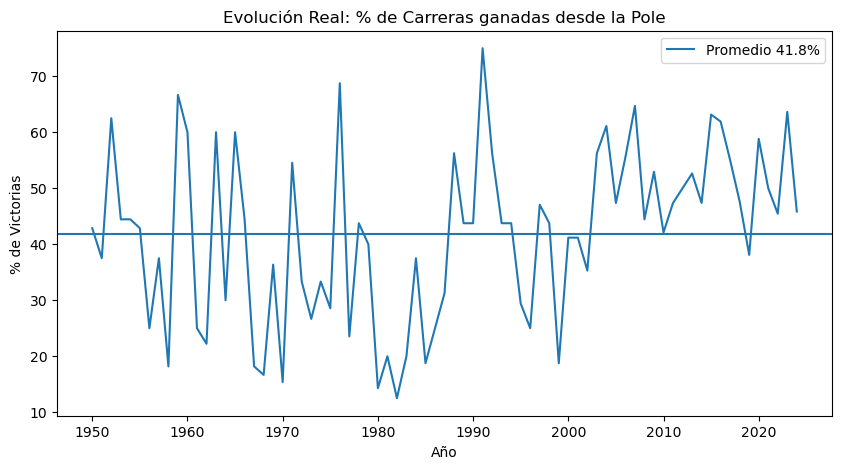

In [6]:

# Grafica de lineas por porcentaje de carreras ganadas desde la pole

# Tamañano de la grafica
plt.figure(figsize=(10, 5)) 

# Lineas de la grafica
sns.lineplot(x=porcentaje_victorias.index, y=porcentaje_victorias.values)

# Añadi Titulo principal y titulo a los ejes
plt.title('Evolución Real: % de Carreras ganadas desde la Pole')
plt.ylabel('% de Victorias')
plt.xlabel('Año')

# Añadi axhline para marcar la linea promedio
plt.axhline(y=41.83, label='Promedio 41.8%')
plt.legend()
plt.show()

In [7]:
# Filtro de los ganadores de las carreras (posicion_final = 1)
ganadores = df[df['posicion_final'] == 1]



In [8]:
ganadores

,año,apellido_piloto,pais_circuito,posicion_salida,posicion_final,puntos,id_carrera,id_piloto,pais_piloto,es_local,gano_desde_pole
0,2009,Button,Australia,1,1,10.0,1,18,UK,False,True
20,2009,Button,Malaysia,1,1,5.0,2,18,UK,False,True
40,2009,Vettel,China,1,1,10.0,3,20,Germany,False,True
60,2009,Button,Bahrain,4,1,10.0,4,18,UK,False,False
80,2009,Button,Spain,1,1,10.0,5,18,UK,False,True
...,...,...,...,...,...,...,...,...,...,...,...
26568,2024,Sainz,Mexico,1,1,25.0,1140,832,Spain,False,True
26588,2024,Verstappen,Brazil,17,1,26.0,1141,830,Netherlands,False,False
26608,2024,Russell,United States,1,1,25.0,1142,847,UK,False,True
26628,2024,Verstappen,Qatar,2,1,25.0,1143,830,Netherlands,False,False


In [9]:
# Conteo cuántas veces ha ganado cada posición de salida (top10)

victorias_por_posicion =  ganadores['posicion_salida'].value_counts().sort_index().head(10)

### Victorias según Posición de Salida
¿Desde qué otras posiciones es posiciones ganar? Analice el Top 10 de posiciones de salida que más victorias han producido.

In [10]:
victorias_por_posicion

posicion_salida
1     481
2     268
3     137
4      68
5      49
6      40
7      23
8      17
9       5
10     12
Name: count, dtype: int64

### Análisis de Victorias por Posición de Salida
Este gráfico de barras desglosa el origen de los ganadores más allá de la Pole Position.


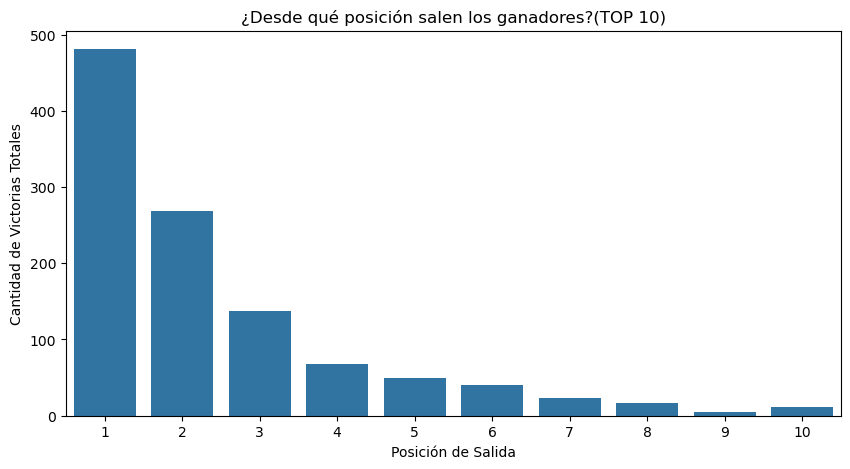

In [11]:
# Gráfica de barras de victorias segun posicion (top 10)

# Tamaño
plt.figure(figsize=(10, 5))

# Diseño de las barras
sns.barplot(x=victorias_por_posicion.index, y=victorias_por_posicion.values)  # Crea un gráficos de barras para comparar las carreras ganadas desde distintas posiciones

# Añadi Titulo principal y titulo a los ejes
plt.title('¿Desde qué posición salen los ganadores?(TOP 10)')
plt.xlabel('Posición de Salida')
plt.ylabel('Cantidad de Victorias Totales')

plt.show()

## Conclusiones Hipotesis 1

###  Sobre la importancia de la Pole Position
* **Tendencia historica:** Tal y como muestra la grafica de lineas, el porcentaje de victorias desde la Pole se ha mantenido estable en torno al **41.83 %** a lo largo de las decadas. Esto sugiere que, a pesar de los cambios tecnológicos, salir primero sigue siendo determinante.
* **Posicion de salida:** La grafica de barras confirma que la **Posición 1** es la que tiene mas victorias, cerca de las quinietas victorias **(481)**, validando que la clasificación es la parte más crítica del fin de semana.



## Hipótesis 2: El 'Efecto Local'
**Pregunta:** ¿Tienen los pilotos un rendimiento superior cuando corren en su país natal?

Comparame el promedio de **puntos obtenidos** por los pilotos cuando corren en casa (`es_local = True`) frente a cuando corren fuera (`es_local = False`).

In [12]:

ganadores

,año,apellido_piloto,pais_circuito,posicion_salida,posicion_final,puntos,id_carrera,id_piloto,pais_piloto,es_local,gano_desde_pole
0,2009,Button,Australia,1,1,10.0,1,18,UK,False,True
20,2009,Button,Malaysia,1,1,5.0,2,18,UK,False,True
40,2009,Vettel,China,1,1,10.0,3,20,Germany,False,True
60,2009,Button,Bahrain,4,1,10.0,4,18,UK,False,False
80,2009,Button,Spain,1,1,10.0,5,18,UK,False,True
...,...,...,...,...,...,...,...,...,...,...,...
26568,2024,Sainz,Mexico,1,1,25.0,1140,832,Spain,False,True
26588,2024,Verstappen,Brazil,17,1,26.0,1141,830,Netherlands,False,False
26608,2024,Russell,United States,1,1,25.0,1142,847,UK,False,True
26628,2024,Verstappen,Qatar,2,1,25.0,1143,830,Netherlands,False,False


In [13]:
# Conteo cuantas victorias han sido por locales y cuantas por no locales

victoria_local = ganadores['es_local'].value_counts()
victoria_local

es_local
False    1035
True       93
Name: count, dtype: int64

In [14]:
# Porcentaje de pilotos locales que han ganado

round(ganadores['es_local'].value_counts(normalize=True) * 100, 2)

es_local
False    91.76
True      8.24
Name: proportion, dtype: float64

### Análisis de Victorias de pilotos en carreras locales
En este gráfico de pastel visualice qué porcentaje del total de victorias en la historia han sido conseguidas por pilotos corriendo en su propio país ("Local") frente a pilotos extranjeros ("Visitante").

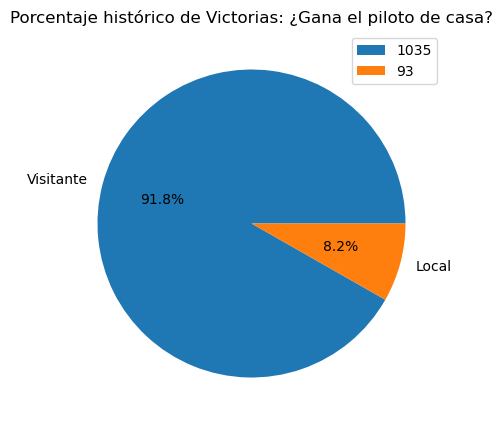

In [15]:
# Grafico pastel para porcentajes

plt.figure(figsize=(5, 5))

# Conteo de victorias
datos = ganadores['es_local'].value_counts()

# Gráfico de Pastel
plt.pie(datos, 
        labels=['Visitante', 'Local'], 
        autopct='%1.1f%%',   # añadi el porcentaje dentro de la grafica 
        
)

# Añadi la leyenda con el total de victorias de pilotos locales y no locales y un titulo
plt.legend(victoria_local)
plt.title('Porcentaje histórico de Victorias: ¿Gana el piloto de casa?')
plt.show()

-  Rendimiento promedio (puntos y posicion)



In [16]:
# Filtro para saber si el piloto a puntuado 
df_puntos = df[df['puntos'] > 0]

# Calculamos la media de puntos siendo local y no siendolo
rendimiento_puntuan = df_puntos.groupby('es_local')['puntos'].mean()

In [17]:
redondeo = round((rendimiento_puntuan),2)
redondeo

es_local
False    6.59
True     5.47
Name: puntos, dtype: float64

In [18]:
#Obtencion de diferencia de puntos siendo local y no siendolo

diferencia_puntos = redondeo[False] - redondeo[True]
diferencia_puntos 

np.float64(1.12)

### Comparativa de Rendimiento: Puntos Promedio
Para ser más preciso, no solo observelas victorias, sino el **promedio de puntos obtenidos**. Esto nos dice qué tal rinden los pilotos en general (sean campeones o de mitad de tabla) cuando corren en casa.

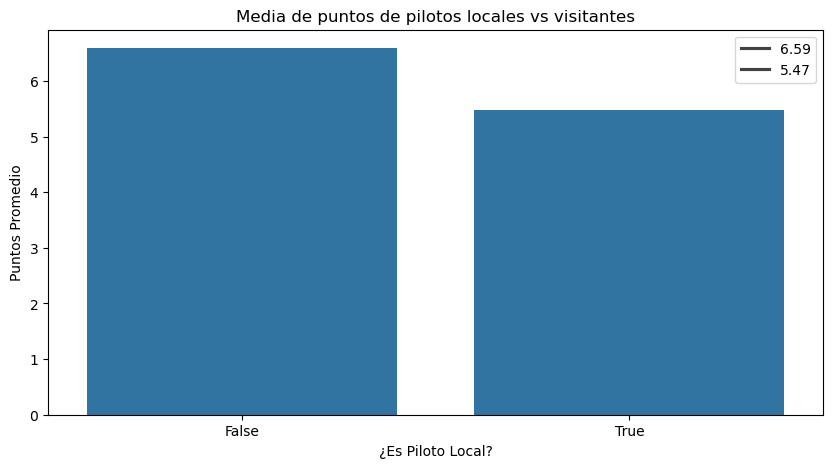

In [19]:
# Gráfico de barras

plt.figure(figsize=(10, 5)) # Tamaño de la

sns.barplot(x=rendimiento_puntuan.index, y=rendimiento_puntuan.values)  #Cree gráficos de barras para comparar categorías ( puntos de locales vs. visitantes).

# Añadi Titulo principal y titulo a los ejes
plt.title('Media de puntos de pilotos locales vs visitantes')
plt.ylabel('Puntos Promedio')
plt.xlabel('¿Es Piloto Local?')
plt.legend(redondeo)


plt.show()

## Conclusiones Hipotesis 2

###  Sobre la importancia de se local y su puntuacion media
* **Tendencia historica:** Tal y como muestra la gráfica de tarta, el porcentaje de victorias siendo local demuestra que no importa, con un porcentaje de **8.2%** de victorias por piloto siendo local y un porcentaje de victorias del **91,8%** para pilotos en circuitors siendo no local.
* **Media de puntos de pilotos:** La grafica de barras demuestra que la media de puntos siendo local es mas baja que al no serlo, con una media de puntos de **5.47** puntos siendo local y **6.59** puntos no siendolo. Esto puede ser debido a que los pilotos locales no siempre son los mejores pilotos. Puede que tambien suba el promedio de puntos los resultados de los pilotos dominantes, ya que suelen acumular muchos puntos en la mayoria de circuitos